In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('/content/AAPL.csv')

In [5]:
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,125.16,127.09,125.06,126.20,50999452,115.337869,117.116409,115.245717,116.296253,50999452,0.0,1.0
1,124.50,125.74,123.90,125.32,42162332,114.729663,115.872352,114.176749,115.485313,42162332,0.0,1.0
2,122.77,123.61,122.12,123.09,44455540,113.135428,113.909508,112.536438,113.430315,44455540,0.0,1.0
3,123.38,123.91,122.55,123.38,33618097,113.697557,114.185965,112.932693,113.697557,33618097,0.0,1.0
4,122.99,123.50,122.27,123.15,37011653,113.338163,113.808140,112.674666,113.485607,37011653,0.0,1.0


In [6]:
stockClosed = df['close']

In [7]:
stockClosed.head()

0    125.16
1    124.50
2    122.77
3    123.38
4    122.99
Name: close, dtype: float64

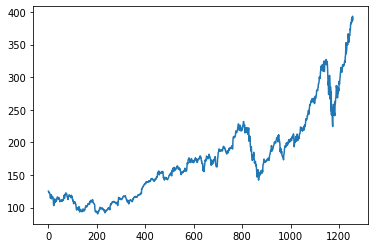

In [8]:
plt.plot(stockClosed)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
stockClosed = scaler.fit_transform(np.array(stockClosed).reshape(-1,1))

In [10]:
stockClosed

array([[0.11488337],
       [0.1127058 ],
       [0.10699792],
       ...,
       [0.97320928],
       [1.        ],
       [0.98208453]])

In [11]:
training_size = int(len(stockClosed)*0.65)
testing_size = len(stockClosed)-training_size
train_data, test_data = stockClosed[0:training_size,:],stockClosed[training_size:len(stockClosed),:]

In [12]:
train_data.shape, test_data.shape

((817, 1), (441, 1))

In [13]:
def dataset_gen(data, time_step):
  dataX, dataY =[],[]
  for i in range(len(data)-time_step-1):
    dataX.append(data[i:(i+time_step),0])
    dataY.append(data[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [14]:
x_train, y_train = dataset_gen(train_data,100)
x_test, y_test = dataset_gen(test_data,100)

In [15]:
print('Train data shape: ',x_train.shape, y_train.shape)
print('Test data shape: ',x_test.shape, y_test.shape)

Train data shape:  (716, 100) (716,)
Test data shape:  (340, 100) (340,)


In [16]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [18]:
lstm_model = Sequential()
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
lstm_model.add(LSTM(50,return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
lstm_model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0179 - val_loss: 0.0436
Epoch 2/100
12/12 [==============================] - 1s 75ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 3/100
12/12 [==============================] - 1s 75ms/step - loss: 6.3733e-04 - val_loss: 0.0031
Epoch 4/100
12/12 [==============================] - 1s 75ms/step - loss: 4.4197e-04 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 1s 75ms/step - loss: 4.0861e-04 - val_loss: 0.0029
Epoch 6/100
12/12 [==============================] - 1s 74ms/step - loss: 3.9415e-04 - val_loss: 0.0028
Epoch 7/100
12/12 [==============================] - 1s 73ms/step - loss: 3.9153e-04 - val_loss: 0.0026
Epoch 8/100
12/12 [==============================] - 1s 75ms/step - loss: 3.7833e-04 - val_loss: 0.0027
Epoch 9/100
12/12 [==============================] - 1s 73ms/step - loss: 3.8781e-04 - val_loss: 0.0026
Epoch 10/100
12/12 [==============================] - 1s 75ms/step - lo

In [21]:
train_predict = lstm_model.predict(x_train)
test_predict = lstm_model.predict(x_test)

In [22]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
print('Train RMSE: ',np.sqrt(mean_squared_error(y_true=y_train,y_pred=train_predict)))
print('Test RMSE: ',np.sqrt(mean_squared_error(y_true=y_test,y_pred=test_predict)))

Train RMSE:  149.75871598876384
Test RMSE:  261.04627748447825
